## Comparing INP classification based on NHISS vs SpMAX4_Bh(s)

Indocyanine nanoparticle (INP) former and non-former classification of NHISS and SpMAX4_Bh(s) descriptors were compared by plotting, calculating correlation coefficients and constructing confusion matrix. Threshold values of both descriptors were determined based on their respective training sets: N=16 for SpMAX4_Bh(s) and N=52 for NHISS.

In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
%matplotlib inline 

In [2]:
df_molecules_spmax=pd.DataFrame.from_csv('df_molecules_spmax.csv', encoding='utf-8')
df_molecules_spmax=df_molecules_spmax.iloc[:,0:17]

#Drop drugs with NAN Spmax values from the dataframe
print(df_molecules_spmax.shape)
df_molecules_spmax = df_molecules_spmax.dropna(subset=["SpMax4_Bh(s)"])
df_molecules_spmax= df_molecules_spmax.reset_index(drop=True)
print(df_molecules_spmax.shape)

df_molecules_spmax.head()

(415, 17)
(414, 17)


,NAME,molecule label,smiles,F,carbonyl,sulfinyl,sulfonyl,nitroso,nitro,NHISS,SpMax1_Bh(s),SpMax2_Bh(s),SpMax3_Bh(s),SpMax4_Bh(s),SpMax5_Bh(s),SpMax6_Bh(s),SpMax7_Bh(s)
0,A 939572.mol,A 939572,CNC(=O)c1cccc(c1)NC(=O)N2CCC(CC2)Oc3ccccc3Cl,0,2,0,0,0,0,2,7.432,7.427,4.990,4.725,4.485,4.314,4.183
1,ABT-751.mol,ABT-751,COc1ccc(cc1)S(=O)(=O)Nc2cccnc2Nc3ccc(cc3)O,0,0,0,1,0,0,2,7.717,6.999,6.471,4.920,4.844,4.615,4.328
2,ABT737.mol,ABT737,CN(C)CC[C@@H](CSc1ccccc1)Nc2ccc(cc2[N+](=O)[O-...,0,1,0,1,0,1,5,7.815,7.718,7.427,6.999,6.999,4.959,4.760
3,AGI-6780.mol,AGI-6780,c1cc(cc(c1)NC(=O)Nc2cc(ccc2c3ccsc3)S(=O)(=O)NC...,3,1,0,1,0,0,6,8.513,7.999,7.999,7.717,7.431,6.999,4.792
4,AMI-1.mol,AMI-1,c1cc2c(cc1NC(=O)Nc3ccc4c(c3)cc(cc4O)S(=O)(=O)O...,0,1,0,2,0,0,5,7.864,7.855,7.431,7.246,7.243,6.999,6.999


In [3]:
df_430molecules_NHISS=df_molecules_spmax.ix[:,("molecule label", "smiles","NHISS")]
csv=df_430molecules_NHISS.to_csv(file_name="df_430molecules_NHISS.csv", sep=",")
df_430molecules_NHISS.tail()

,molecule label,smiles,NHISS
409,levothyroxine,c1c(cc(c(c1I)Oc2cc(c(c(c2)I)O)I)I)C[C@@H](C(=O...,1
410,linagliptin,CC#CCn1c2c(nc1[N@]3CCC[C@H](C3)N)n(c(=O)n(c2=O...,2
411,mebendazole,COC(=O)Nc1[nH]c2ccc(cc2n1)C(=O)c3ccccc3,2
412,mek azd,Cn1cnc2c1cc(c(c2F)Nc3ccc(cc3Cl)Br)C(=O)NOCCO,2
413,mestranol,C[C@]12CC[C@@H]3c4ccc(cc4CC[C@H]3[C@@H]1CC[C@]...,0


### 1. Plotting SpMAX vs NHISS values

(3, 9)

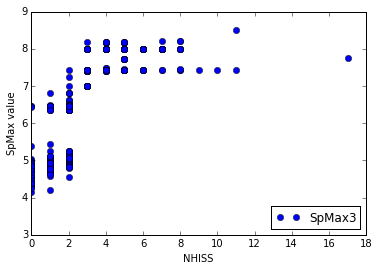

In [4]:
NHISS = df_molecules_spmax.loc[:,"NHISS"]
spmax3 = df_molecules_spmax.loc[:, "SpMax3_Bh(s)"]
spmax4 = df_molecules_spmax.loc[:, "SpMax4_Bh(s)"]
spmax5 = df_molecules_spmax.loc[:, "SpMax5_Bh(s)"]

plt.plot(NHISS, spmax3, 'o' , label="SpMax3")
plt.xlabel("NHISS"); plt.ylabel("SpMax value"); plt.legend(loc="lower right"); plt.ylim(3,9)

(3, 9)

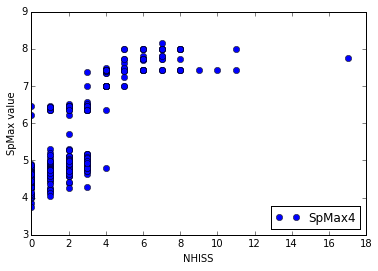

In [5]:
plt.plot(NHISS, spmax4, 'o' , label="SpMax4")
plt.xlabel("NHISS"); plt.ylabel("SpMax value"); plt.legend(loc="lower right"); plt.ylim(3,9)

(3, 9)

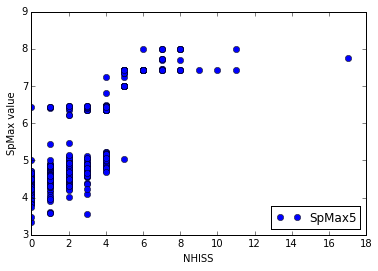

In [6]:
plt.plot(NHISS, spmax5, 'o' , label="SpMax5")
plt.xlabel("NHISS"); plt.ylabel("SpMax value"); plt.legend(loc="lower right"); plt.ylim(3,9)

(3, 9)

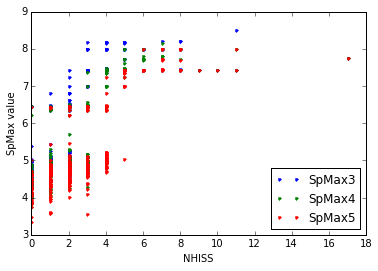

In [7]:
plt.plot(NHISS, spmax3, '.' , label="SpMax3")
plt.plot(NHISS, spmax4, '.' , label="SpMax4")
plt.plot(NHISS, spmax5, '.' , label="SpMax5")
plt.xlabel("NHISS"); plt.ylabel("SpMax value"); plt.legend(loc="lower right"); plt.ylim(3,9)

### 2. Checking categorization based on NHISS and SpMax4

In [8]:
x=df_molecules_spmax.loc[1,"SpMax4_Bh(s)"]
spmax4=float("{0:.2f}".format(df_molecules_spmax.loc[1,"SpMax4_Bh(s)"]))
spmax4

4.92

In [9]:
# Creating categorical values for SpMAx4 and NHISS
df_molecules_spmax.loc[:,"spmax4_cat"] = None

for i, row in enumerate(df_molecules_spmax.iterrows()):
    # round SpMax4_Bh(s)to 2 decimal points
    spmax4=float("{0:.2f}".format(df_molecules_spmax.loc[i,"SpMax4_Bh(s)"]))
    if spmax4 >= 7.0:
        df_molecules_spmax.loc[i,"spmax4_cat"]=1
    else:
        df_molecules_spmax.loc[i,"spmax4_cat"]=0

df_molecules_spmax.loc[:,"NHISS_cat"] = None

for i, row in enumerate(df_molecules_spmax.iterrows()):
    if df_molecules_spmax.loc[i,"NHISS"]>= 4.0:
        df_molecules_spmax.loc[i,"NHISS_cat"]=1
    else:
        df_molecules_spmax.loc[i,"NHISS_cat"]=0
df_molecules_spmax.head()

,NAME,molecule label,smiles,F,carbonyl,sulfinyl,sulfonyl,nitroso,nitro,NHISS,SpMax1_Bh(s),SpMax2_Bh(s),SpMax3_Bh(s),SpMax4_Bh(s),SpMax5_Bh(s),SpMax6_Bh(s),SpMax7_Bh(s),spmax4_cat,NHISS_cat
0,A 939572.mol,A 939572,CNC(=O)c1cccc(c1)NC(=O)N2CCC(CC2)Oc3ccccc3Cl,0,2,0,0,0,0,2,7.432,7.427,4.990,4.725,4.485,4.314,4.183,0,0
1,ABT-751.mol,ABT-751,COc1ccc(cc1)S(=O)(=O)Nc2cccnc2Nc3ccc(cc3)O,0,0,0,1,0,0,2,7.717,6.999,6.471,4.920,4.844,4.615,4.328,0,0
2,ABT737.mol,ABT737,CN(C)CC[C@@H](CSc1ccccc1)Nc2ccc(cc2[N+](=O)[O-...,0,1,0,1,0,1,5,7.815,7.718,7.427,6.999,6.999,4.959,4.760,1,1
3,AGI-6780.mol,AGI-6780,c1cc(cc(c1)NC(=O)Nc2cc(ccc2c3ccsc3)S(=O)(=O)NC...,3,1,0,1,0,0,6,8.513,7.999,7.999,7.717,7.431,6.999,4.792,1,1
4,AMI-1.mol,AMI-1,c1cc2c(cc1NC(=O)Nc3ccc4c(c3)cc(cc4O)S(=O)(=O)O...,0,1,0,2,0,0,5,7.864,7.855,7.431,7.246,7.243,6.999,6.999,1,1


(-0.05, 1.05)

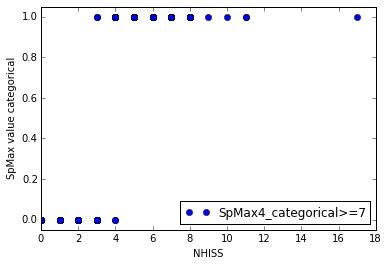

In [10]:
spmax4_cat=df_molecules_spmax.loc[:,"spmax4_cat"]

plt.plot(NHISS, spmax4_cat, 'o' , label="SpMax4_categorical>=7")
plt.xlabel("NHISS"); plt.ylabel("SpMax value categorical"); plt.legend(loc="lower right"); plt.ylim(-0.05,1.05)

In [11]:
#New column to record position in confusion matrix
df_molecules_spmax.loc[:,"confusion_matrix"] = None

spmax4_cat=df_molecules_spmax.loc[:,"spmax4_cat"]
NHISS_cat=df_molecules_spmax.loc[:,"NHISS_cat"]

#(NHISS_cat, spmax4_cat)
count_0_0=0
count_0_1=0
count_1_0=0
count_1_1=0
for i in range(len(NHISS_cat)):
    if NHISS_cat[i]==0:
        if spmax4_cat[i]==0:
            count_0_0=count_0_0+1
            df_molecules_spmax.loc[i,"confusion_matrix"]="TN"
        else:
            count_0_1=count_0_1+1
            df_molecules_spmax.loc[i,"confusion_matrix"]="FN"
    else:
        if spmax4_cat[i]==0:
            count_1_0=count_1_0+1
            df_molecules_spmax.loc[i,"confusion_matrix"]="FP"
        else:
            count_1_1=count_1_1+1
            df_molecules_spmax.loc[i,"confusion_matrix"]="TP"

print "count_0_0: ", count_0_0
print "count_0_1: ", count_0_1
print "count_1_0: ", count_1_0
print "count_1_1: ", count_1_1


count_0_0:  266
count_0_1:  2
count_1_0:  2
count_1_1:  144


In [12]:
TP=float(count_1_1)
TN=float(count_0_0)
FP=float(count_1_0)
FN=float(count_0_1)


#Accuracy
ACC= (TP+TN)/(TP+TN+FP+FN)
print "ACC: {0:.3f} (accuracy)".format(ACC) 

#True positive rate = sensitivity
TPR= TP/(TP+FN)
print "TPR: {0:.3f} (sensitivity)".format(TPR) 

#True negative rate = specificity
TNR=TN/(FP+TN)
print "TNR: {0:.3f} (specificity)".format(TNR) 

#Positive predictive value (precision)
PPV=TP/(TP+FP)
print "PPV: {0:.3f} (precision)".format(PPV) 

#False discovery rate
FDR=1-PPV
print "FDR: {0:.3f} (false discovery rate)".format(FDR) 

#Negative predictive value
NPV=TN/(TN+FN)
print "NPV: {0:.3f}".format(NPV) 

#False omission rate
FOR=FN/(TN+FN)
print "FOR: {0:.3f}".format(FOR) 

#False negative rate
FNR=FN/(TP+FP)
print "FNR: {0:.3f}".format(FNR) 

#False positive rate
FPR=FP/(TN+FN)
print "FPR: {0:.3f}".format(FPR) 

ACC: 0.990 (accuracy)
TPR: 0.986 (sensitivity)
TNR: 0.993 (specificity)
PPV: 0.986 (precision)
FDR: 0.014 (false discovery rate)
NPV: 0.993
FOR: 0.007
FNR: 0.014
FPR: 0.007


In [13]:
df_molecules_spmax.head()

,NAME,molecule label,smiles,F,carbonyl,sulfinyl,sulfonyl,nitroso,nitro,NHISS,SpMax1_Bh(s),SpMax2_Bh(s),SpMax3_Bh(s),SpMax4_Bh(s),SpMax5_Bh(s),SpMax6_Bh(s),SpMax7_Bh(s),spmax4_cat,NHISS_cat,confusion_matrix
0,A 939572.mol,A 939572,CNC(=O)c1cccc(c1)NC(=O)N2CCC(CC2)Oc3ccccc3Cl,0,2,0,0,0,0,2,7.432,7.427,4.990,4.725,4.485,4.314,4.183,0,0,TN
1,ABT-751.mol,ABT-751,COc1ccc(cc1)S(=O)(=O)Nc2cccnc2Nc3ccc(cc3)O,0,0,0,1,0,0,2,7.717,6.999,6.471,4.920,4.844,4.615,4.328,0,0,TN
2,ABT737.mol,ABT737,CN(C)CC[C@@H](CSc1ccccc1)Nc2ccc(cc2[N+](=O)[O-...,0,1,0,1,0,1,5,7.815,7.718,7.427,6.999,6.999,4.959,4.760,1,1,TP
3,AGI-6780.mol,AGI-6780,c1cc(cc(c1)NC(=O)Nc2cc(ccc2c3ccsc3)S(=O)(=O)NC...,3,1,0,1,0,0,6,8.513,7.999,7.999,7.717,7.431,6.999,4.792,1,1,TP
4,AMI-1.mol,AMI-1,c1cc2c(cc1NC(=O)Nc3ccc4c(c3)cc(cc4O)S(=O)(=O)O...,0,1,0,2,0,0,5,7.864,7.855,7.431,7.246,7.243,6.999,6.999,1,1,TP


#### False positive and False negative drugs 
Drugs which are categorized differently by NHISS descriptor, compared to SpMAX4_Bh(s)
False positive: NHISS predicts nanoparticle formation but SpMAX4_Bh(s) does not.
False negative: NHISS predicts no nanoparticle formation but SpMAX4_Bh(s) categorizes the drug as nanoparticle former.

In [14]:
for i, row in enumerate(df_molecules_spmax.iterrows()):
    if df_molecules_spmax.loc[i,"confusion_matrix"]=="FN":
        print "FN: ", df_molecules_spmax.loc[i,"molecule label"]
    elif df_molecules_spmax.loc[i,"confusion_matrix"]=="FP":
        print "FP: ", df_molecules_spmax.loc[i,"molecule label"]   

FN:  Fosinopril
FN:  HMN-214
FP:  Sulfinpyrazone
FP:  Sulindac


In [15]:
from scipy.stats import spearmanr, kendalltau, pearsonr

spearmanr(spmax4_cat, NHISS_cat)

SpearmanrResult(correlation=0.97883868329584955, pvalue=5.3186957332210779e-286)

In [16]:
pearsonr(spmax4_cat, NHISS_cat)

(0.97883868329584955, 5.3186957332208399e-286)